#Ch01-1기온 데이터 분석 시작하기


##기온 공공데이터 살펴보기

기상청은 기상자료개방포털 홈페이지를 통해 기상 관련 데이터를 무료로 제공  

\[[기상자료개방포털](https://data.kma.go.kr)\]  

상단 메뉴에서, **기후통계분석/통계분석/기온분석**을 선택합니다.

**검색조건** 메뉴에서 지역/지점은 "부산"을 선택하고 기간은 "1907년 10월 1일부터 어제"까지로 선택한 후 **검색** 버튼을 클릭하세요. 검색이 완료된 후 CSV 버튼을 클릭하여 해당 데이터를 csv 파일 형태로 다운로드 합니다. 




##CSV 파일이란
다운로드 받은 파일은 더블 클릭하여 excel로 열어서 데이터를 확인하세요.

##데이터 분석에 필요한 환경 만들기
구글 colab 환경에 진행하겠습니다.

#Ch01-2 부산의 기온 데이터 분석하기


##1. CSV 파일에서 데이터 읽어 오기

- ```csv.reader()``` : CSV 파일에서 데이터 읽어오는 함수
- ```csv.writer()``` : CSV 파일에 데이터를 저장하는 함수

위에서 다운로드 받은 CSV 파일을 더블 클릭하여 excel로 열어서 내용을 살펴보면 첫 번째 행부터 여섯 번째 행은 이 파일에 대한 간략한 설명이 있고 일곱 번째 행은 실 데이터와 구분하기 위해 빈 행이 있습니다. 1행 부터 7 행까지는 실제 데이터가 아니므로 삭제하겠습니다. 

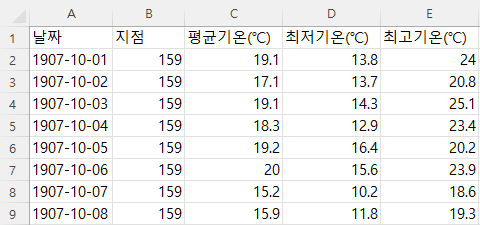  

위와 같이 변경 후 파일의 이름을 '부산'으로 변경하여 저장하십시요. 그리고 이 '부산.csv' 파일을 colab 환경에서 인식할 수 있도록 몇 가지 작업을 하겠습니다. 강사의 안내에 따라 주세요.




'부산.csv' 파일에서 데이터를 읽어 오는 코드를 작성해 보겠습니다. 

In [ ]:
import csv
f = open('부산.csv', 'r')
data = csv.reader(f)
print(data)
f.close()

위 코드 셀에서 
- 1번 라인, ```import csv```는 csv 모듈을 불러 옴
- 2번 라인, ```f=open('부산.csv', 'r')```은 csv 파일(부산.csv)을 열어서 파일 핸들러를 f에 저장
- 3번 라인, ```data=csv.reader(f)```는 파일 핸들러 ```f```를 ```csv.reader()```함수에 전달해서 '부산.csv' 파일을 핸들링 할 수 있는 객체를 ```data```에 할당.

##2. 데이터 출력하기


```
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  print(row)

f.close()
```

위 코드에 보인 ```f=open('부산.csv', 'r', endocing='cp949')```에 대해 살펴 보겠습니다. ```open()```함수의 두 번째 인자 'r'의 의미는 파일을 여는데 '읽기 모드'로 열겠다는 뜻입니다. 세 번째 인자에서 ```cp949```의 의미는 Window의 한글 인코딩 방식으로 읽어 오겠다는 뜻입니다. 세 번째 인자의 의미는 일단 여기서 크게 중요하지 않습니다. 위 코드 블록을 실행 시켜서 결과를 확인하세요.

In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  print(row)

f.close()
# 꽤 많은 데이터를 출력하기 때문에 시간이 다소 걸립니다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['\t2009-06-13', '159', '21.2', '18.5', '26.7']
['\t2009-06-14', '159', '20.2', '18.2', '23.8']
['\t2009-06-15', '159', '19.8', '17.9', '22.8']
['\t2009-06-16', '159', '20.4', '17', '23.8']
['\t2009-06-17', '159', '21.1', '18.5', '25']
['\t2009-06-18', '159', '23.2', '19.7', '27.1']
['\t2009-06-19', '159', '23.8', '21.2', '27.2']
['\t2009-06-20', '159', '23.4', '20.7', '27.6']
['\t2009-06-21', '159', '23', '21.6', '26.2']
['\t2009-06-22', '159', '20.9', '19.1', '22.2']
['\t2009-06-23', '159', '23.2', '19.2', '28.8']
['\t2009-06-24', '159', '25.3', '22.5', '29.1']
['\t2009-06-25', '159', '25', '21', '29.8']
['\t2009-06-26', '159', '23.3', '20.7', '26.9']
['\t2009-06-27', '159', '24.4', '21.8', '27.9']
['\t2009-06-28', '159', '24.2', '20.8', '27.7']
['\t2009-06-29', '159', '22.9', '20.9', '25.8']
['\t2009-06-30', '159', '21.1', '18.4', '24']
['\t2009-07-01', '159', '21.7', '18.4', '26.1']
['\t2009-07-02', '159', '22.6', '19.9', '25.8']
['\t2009-07-03',

#####여기서 잠깐!
위 코드를 실행해서 얻은 출력 결과 데이터를 꼼꼼하게 살펴 보겠습니다. 

- 각 행의 데이터가 대괄호([])로 둘러싸여 있음, 즉 리스트!
- 각 행, 리스트 형 데이터의 각 요소가 작은 따옴표로 둘러싸여 있음, 즉 문자열!
- 누락된 데이터가 있음, 1967년 2월 19일과 1973년 10월 16일 데이터를 확인해보세요.




In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  if row[0] == "\t1967-02-19" or row[0] =="\t1973-10-16":
    print(row)

f.close()

['\t1967-02-19', '159', '2.7', '', '']
['\t1973-10-16', '159', '15.9', '', '']


1967년 2월 19일 데이터를 보면 평균 기온 2.7도는 기록되어 있으나 최저기온과 최고 기온 데이터가 누락되어 있음을 알 수 있습니다. 

##3. 헤더 확인하기


In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
print(header)
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)
print(header)
first_row = next(data)
print(first_row)

f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['\t1907-10-01', '159', '19.1', '13.8', '24']


```next()```함수는 ```data```의 한 행 데이터를 반환 후 ```data```에서 그 행을 삭제 한다.

In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)
print(header)
for row in data:
  print(row)

f.close()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['\t2009-06-14', '159', '20.2', '18.2', '23.8']
['\t2009-06-15', '159', '19.8', '17.9', '22.8']
['\t2009-06-16', '159', '20.4', '17', '23.8']
['\t2009-06-17', '159', '21.1', '18.5', '25']
['\t2009-06-18', '159', '23.2', '19.7', '27.1']
['\t2009-06-19', '159', '23.8', '21.2', '27.2']
['\t2009-06-20', '159', '23.4', '20.7', '27.6']
['\t2009-06-21', '159', '23', '21.6', '26.2']
['\t2009-06-22', '159', '20.9', '19.1', '22.2']
['\t2009-06-23', '159', '23.2', '19.2', '28.8']
['\t2009-06-24', '159', '25.3', '22.5', '29.1']
['\t2009-06-25', '159', '25', '21', '29.8']
['\t2009-06-26', '159', '23.3', '20.7', '26.9']
['\t2009-06-27', '159', '24.4', '21.8', '27.9']
['\t2009-06-28', '159', '24.2', '20.8', '27.7']
['\t2009-06-29', '159', '22.9', '20.9', '25.8']
['\t2009-06-30', '159', '21.1', '18.4', '24']
['\t2009-07-01', '159', '21.7', '18.4', '26.1']
['\t2009-07-02', '159', '22.6', '19.9', '25.8']
['\t2009-07-03', '159', '22.3', '19.6', '26.2']
['\t2009-07-04',

##4. 기온 공공 데이터에 질문하기
엑셀을 이용하여 '부산.csv' 파일을 열어서 데이터를 쭉 살펴 보십시요. 이 데이터들, 다소 거창하게 표현해서 이런 '빅데이터'에서 무엇을 찾을 수 있을까요? 다른 표현이 무엇이 궁금합니까?

- 부산에서 가장 더웠던 날은 언제이고 얼마나 더웠을까?
- 일교차가 가장 큰 날은 1년 중 언제였을까?
- 한달 동안 최저 평균 기온이 가장 낮은 달은 12월? 1월? 2월?
- 가장 덥다고 알려진 대구 보다 부산이 더 더운 날은 1년 중 몇일이나 될까?


#Ch01-3 부산이 가장 더웠던 날은 언제였을까요?

##1. 질문 다음기
**"부산이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?"**  
위 질문에 대해 생각해 보겠습니다.

- '가장 더웠던 날'의 기준은? 덥다는 것은 기온, 습도, 풍속 등 다양한 요소에 의해 결정됨. → **"기상 관측 이래, 부산의 최고 기온이 가장 높았던 날은 언제였고 몇 도였을까?**


##2. 문제 해결 방법 구상하기

'부산.csv' 파일이 가지고 있는 데이터 중 위 질문과 관계된 데이터는 날자와 최고기온입니다.
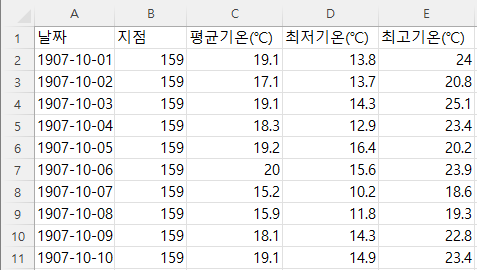

  1. 전체 데이터('부산.csv')를 읽어 들임.
  2. 순차적으로 데이터(행)를 읽어서 최고 기온을 확인
  3. 최고 기온이 가장 높았던 날짜의 해당 기온 데이터를 저장
  4. 최종 저장된 날자와 최고 기온 값을 출력

##3. 파이썬 코드로 구상한 방법을 구현하기

```data```의 각 행은 리스트 형이며 리스트 형 데이터의 마지막 요소가 최고 기온 정보를 담고 있는 데이터였습니다. 그런데 이 데이터가 문자열 형으로 표현되어 있기 때문에 숫자형 데이터로 변경할 필요가 있습니다. 

In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_temp = -999
max_data = ''

for row in data:
  if row[-1] == '':
    row[-1] = -1000           # 존재 할 수 없는 최고 기온.
  else:
    row[-1] = float(row[-1])    # 문자열 형으로 표현된 최고 기온을 숫자형 데이터로 변환하여 저장
  
  if max_temp < row[-1]:
    max_date = row[0]
    max_temp = row[-1]

f.close()
print("기상 관측 이래 부산의 최고 기온이 가장 높았던 날은 " + max_date +"일이며 "+ str(max_temp) +"도였습니다.")

기상 관측 이래 부산의 최고 기온이 가장 높았던 날은 	2016-08-14일이며 37.3도였습니다.


위 코드의 출력, 
```
기상 관측 이래 부산의 최고 기온이 가장 높았던 날은     2016-08-14일이며 37.3도였습니다
```
중간에 빈공간이 들어간 이유는 ?

##### Quiz
빈공간을 제거하여 출력할 수 있도록 코드를 수정해 보세요.

In [ ]:
import csv
f = open('부산.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

max_temp = -999
max_data = ''

for row in data:
  if row[-1] == '':
    row[-1] = -1000           # 존재 할 수 없는 최고 기온.
  else:
    row[-1] = float(row[-1])    # 문자열 형으로 표현된 최고 기온을 숫자형 데이터로 변환하여 저장
  
  if max_temp < row[-1]:
    max_date = row[0].replace('\t','')
    max_temp = row[-1]

f.close()
print("기상 관측 이래 부산의 최고 기온이 가장 높았던 날은 " + max_date +"일이며 "+ str(max_temp) +"도였습니다.")

기상 관측 이래 부산의 최고 기온이 가장 높았던 날은 2016-08-14일이며 37.3도였습니다.
